# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## VII. Profils de production mensuels des vre

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [26]:
vre2017 = pd.read_csv("inputs/vre_profiles2017.csv")
vre2017.columns = ["vre", "heure", "prod"]

In [3]:
vre2016 = pd.read_csv("inputs/vre_profiles2016.csv")
vre2016.columns = ["vre", "heure", "prod"]
vre2015 = pd.read_csv("inputs/vre_profiles2015.csv")
vre2015.columns = ["vre", "heure", "prod"]
vre2014 = pd.read_csv("inputs/vre_profiles2014.csv")
vre2014.columns = ["vre", "heure", "prod"]
vre2013 = pd.read_csv("inputs/vre_profiles2013.csv")
vre2013.columns = ["vre", "heure", "prod"]
vre2012 = pd.read_csv("inputs/vre_profiles2012.csv")
vre2012.columns = ["vre", "heure", "prod"]
vre2011 = pd.read_csv("inputs/vre_profiles2011.csv")
vre2011.columns = ["vre", "heure", "prod"]
vre2010 = pd.read_csv("inputs/vre_profiles2010.csv")
vre2010.columns = ["vre", "heure", "prod"]

### 1. Utils

In [4]:
def Moyenne_jour(profil):
    heures, jours = np.shape(profil)
    moy_j = np.zeros(jours)
    for j in range(jours):
        for h in range(heures):
            moy_j[j] += profil[h,j]
    moy_j = moy_j/jours
    return moy_j

In [14]:
def Profils_mensuels(profil, vre, mois, annee=0, verbose=False):
    if vre=="offshore":
        n=0
    elif vre=="onshore":
        n=8759
    elif vre=="pv":
        n=17518
        
    profil_jour = np.zeros((24,365))
    for j in range(365):
        for i in range(24):
            profil_jour[i,j] += [profil["prod"][(i+1)+j*24+n]]
    
    moy_mois = np.zeros((30,12))
    for m in range(1,13):
        moy_mois[:,m-1] = Moyenne_jour(profil_jour[:,(m-1)*30:m*30])

    plt.plot(moy_mois[:,mois-1], label=annee)
    plt.title("Profil mensuel de la production de : " + vre + " pour le mois " + str(mois))
    plt.xlabel("Jours")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
    if verbose :
        return moy_mois

In [15]:
def Affichage_annees(vre, mois):
    Profils_mensuels(vre2017, vre, mois, "2017")
    Profils_mensuels(vre2016, vre, mois, "2016")
    Profils_mensuels(vre2015, vre, mois, "2015")
    Profils_mensuels(vre2014, vre, mois, "2014")
    Profils_mensuels(vre2013, vre, mois, "2013")
    Profils_mensuels(vre2012, vre, mois, "2012")
    Profils_mensuels(vre2011, vre, mois, "2011")
    Profils_mensuels(vre2010, vre, mois, "2010")
    #plt.show()

### 2. Profils de l'éolien offshore

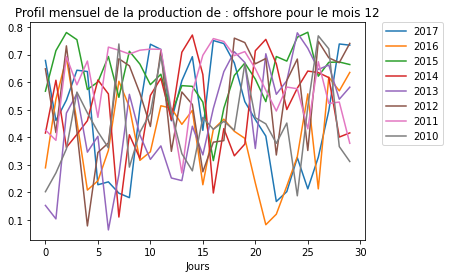

In [16]:
Affichage_annees("offshore", 12)

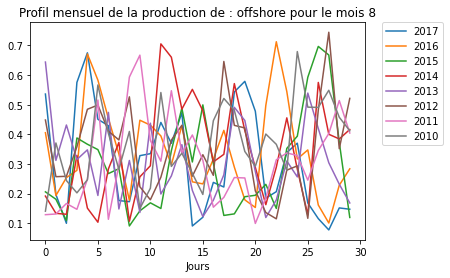

In [17]:
Affichage_annees("offshore", 8)

### 3. Profils de l'éolien onshore

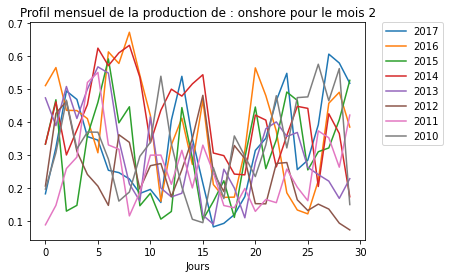

In [25]:
Affichage_annees("onshore", 2)

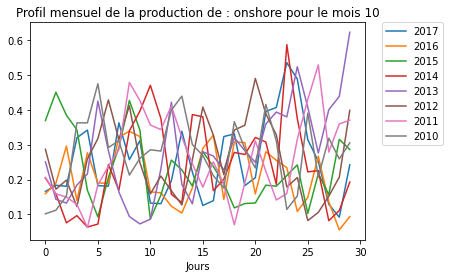

In [24]:
Affichage_annees("onshore", 10)

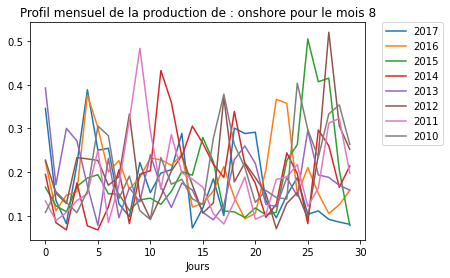

In [23]:
Affichage_annees("onshore", 8)

### 4. Profils du solaire

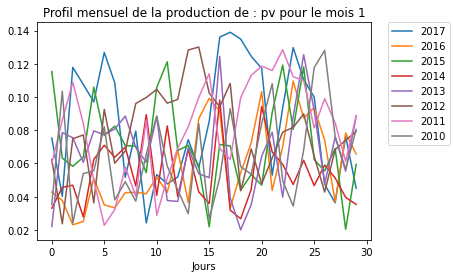

In [20]:
Affichage_annees("pv", 1)

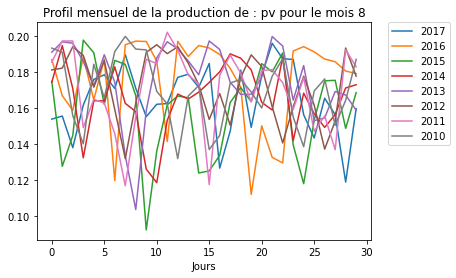

In [22]:
Affichage_annees("pv",8)